In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sachinpatel21/az-handwritten-alphabets-in-csv-format")

print("Path to dataset files:", path)

100%|██████████| 185M/185M [00:01<00:00, 190MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format/versions/5


In [3]:
!mv /root/.cache/kagglehub/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format/versions/5 /content


In [4]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv("/content/5/A_Z Handwritten Data.csv")
df.head()


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Description
This is a dataset containing handwrittern letters a-z
The images are in 28x28 pixels format making it a total of 784 values per image as a single row
and the first column(0) of the csv file corresponds to class 0-25 (a-z) i.e the actual label

I think the images are centered in only 20 x 20 pixels hence many pixel values are just 0's

In [4]:
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# NN Approach
we're going to build a Neural Network to correctly predict the label given the image

In [7]:
Y = torch.tensor(df['0'].values,device='cuda')

In [8]:
Y

tensor([ 0,  0,  0,  ..., 25, 25, 25], device='cuda:0')

In [9]:
df.drop(['0'],axis=1,inplace=True)

In [10]:
X = torch.tensor(df.values,device='cuda')

In [ ]:
X.shape

torch.Size([372450, 784])

In [ ]:
X[0,:]

tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   2, 177, 255, 188,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 130, 255, 255, 255, 161,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

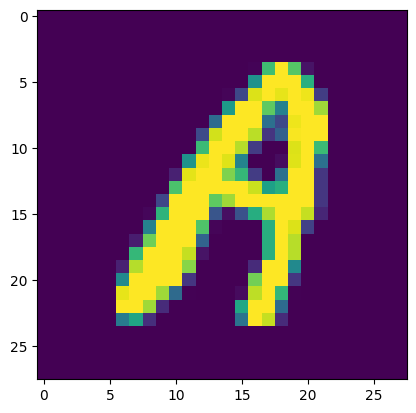

In [ ]:
plt.imshow(X[0,:].cpu().reshape(28,28))

In [ ]:
import torch.nn.functional as F

In [ ]:
Y = F.one_hot(Y,num_classes=26)
Y

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1]], device='cuda:0')

In [ ]:
mygen = torch.Generator(device='cpu')

In [ ]:
mygen.manual_seed(21)

In [ ]:
X.shape

torch.Size([372450, 784])

In [ ]:
indices = torch.randperm(X.size()[0],generator=mygen)

In [ ]:
indices

tensor([327303, 356560, 347354,  ...,  71615, 203929,  67343])

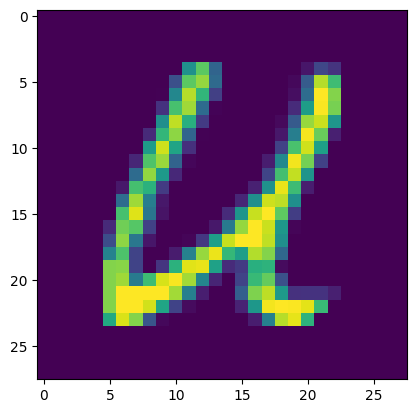

In [ ]:
plt.imshow(X[0,:].cpu().reshape(28,28))

In [ ]:
Y[0,:]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0], device='cuda:0')

In [ ]:
train = int(0.8*X.size()[0])

In [ ]:
x_train,x_test,y_train,y_test = X[:train],X[train:],Y[:train],Y[train:]


# Architecture

first hidden layer: 32 Neurons, relU activation

second hidden layer : 16 Neurons, relU

last layer : 26 outputs(probablities w.r.t each class)(softmax)

In [ ]:
if torch.cuda.is_available():
  torch.set_default_device("cuda")

In [ ]:
mygen_GPU = torch.Generator(device='cuda')
mygen_GPU.manual_seed(21)

In [ ]:
# first hidden layer

W1 = torch.randn((784,128),generator=mygen_GPU,requires_grad=True)
b1 = torch.randn(128,generator=mygen_GPU)
op = torch.relu(x_train.float() @ W1 + b1)
op.shape

torch.Size([297960, 128])

In [ ]:
# second hidden layer

W2 = torch.randn((128,64),generator=mygen_GPU,requires_grad=True)
b2 = torch.randn(64,generator=mygen_GPU)
op2 = torch.relu(op @ W2 + b2)
op2.shape

torch.Size([297960, 64])

In [ ]:
parameters = [ W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters)

108736

In [ ]:
# output layer
W3 = torch.randn((64,26),generator=mygen_GPU,requires_grad=True)
b3 = torch.randn(26,generator=mygen_GPU)
logits = op2 @ W3 + b3


In [ ]:
logits.shape

torch.Size([297960, 26])

In [ ]:
loss = F.cross_entropy(logits, y_train.float())
loss

tensor(267282.4375, device='cuda:0', grad_fn=<DivBackward1>)

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
loss_i = []
step_i = []

In [ ]:
for i in range(20000):

  # # minibatch construct
  # ix = torch.randint(0, x_train.shape[0], (32,))

  # forward pass
  hidden_op = torch.relu(x_train.float() @ W1 + b1)
  hidden_op2 = torch.relu(hidden_op @ W2 + b2)
  logits = hidden_op2 @ W3 + b3

  loss = F.cross_entropy(logits, y_train.float())
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  lr = 0.1 if i < 10000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad
  step_i.append(i)
  loss_i.append(loss.log10().item())

In [ ]:
loss = F.cross_entropy(logits, y_train.float())
loss.log10()

tensor(0.5229, device='cuda:0', grad_fn=<Log10Backward0>)

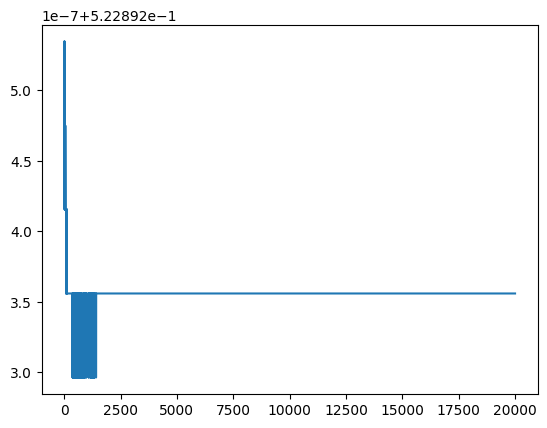

In [ ]:
plt.plot(step_i, loss_i)

In [ ]:
# validation loss
hidden_op = torch.relu(x_test.float() @ W1 + b1)
hidden_op2 = torch.relu(hidden_op @ W2 + b2)
logits_test = hidden_op2 @ W3 + b3
loss_test = F.cross_entropy(logits_test, y_test.float())
loss_test

tensor(4.0237, device='cuda:0', grad_fn=<DivBackward1>)

In [ ]:
probs = torch.softmax(logits_testR,dim=0)

In [ ]:
probs

tensor([0.0495, 0.0063, 0.0273, 0.0598, 0.0024, 0.0017, 0.0164, 0.0322, 0.0244,
        0.0510, 0.0673, 0.0144, 0.0154, 0.0982, 0.1509, 0.0396, 0.0278, 0.0853,
        0.0683, 0.0284, 0.0528, 0.0238, 0.0008, 0.0449, 0.0107, 0.0002],
       device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [22]:
import torch
import torch.nn.functional as F

class NeuralNetwork:
    def __init__(self, input_size=784, hidden1=64, hidden2=32, output_size=26):
        # Initialize weights with smaller values
        self.W1 = torch.randn(input_size, hidden1, device='cuda') * 0.01
        self.b1 = torch.zeros(hidden1, device='cuda')
        self.W2 = torch.randn(hidden1, hidden2, device='cuda') * 0.01
        self.b2 = torch.zeros(hidden2, device='cuda')
        self.W3 = torch.randn(hidden2, output_size, device='cuda') * 0.01
        self.b3 = torch.zeros(output_size, device='cuda')

        # Make parameters trainable
        self.W1.requires_grad_()
        self.b1.requires_grad_()
        self.W2.requires_grad_()
        self.b2.requires_grad_()
        self.W3.requires_grad_()
        self.b3.requires_grad_()

        self.parameters = [self.W1, self.b1, self.W2, self.b2, self.W3, self.b3]

    def forward(self, x):
        # Normalize input in the forward pass
        x = x / 255.0

        # Add batch normalization manually
        x_mean = x.mean(dim=1, keepdim=True)
        x_std = x.std(dim=1, keepdim=True) + 1e-5
        x = (x - x_mean) / x_std

        # First layer
        h1 = torch.relu(x @ self.W1 + self.b1)

        # Second layer
        h2 = torch.relu(h1 @ self.W2 + self.b2)

        # Output layer - no activation
        logits = h2 @ self.W3 + self.b3
        return logits

def train_network(x_train, y_train, x_test, y_test, num_epochs=100, batch_size=256):
    model = NeuralNetwork()
    optimizer = torch.optim.Adam(model.parameters, lr=0.001)  # Reduced learning rate

    train_losses = []
    test_losses = []
    best_test_loss = float('inf')
    patience = 50  # Increased patience
    patience_counter = 0

    for epoch in range(num_epochs):
        # Shuffle the data
        indices = torch.randperm(len(x_train))
        x_train = x_train[indices]
        y_train = y_train[indices]

        epoch_loss = 0
        # Mini-batch training
        for i in range(0, len(x_train), batch_size):
            batch_x = x_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]

            # Forward pass
            logits = model.forward(batch_x)
            loss = F.cross_entropy(logits, batch_y)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        # Evaluate model
        with torch.no_grad():
            # Training loss
            train_logits = model.forward(x_train)
            train_loss = F.cross_entropy(train_logits, y_train)
            train_losses.append(train_loss.item())

            # Test loss
            test_logits = model.forward(x_test)
            test_loss = F.cross_entropy(test_logits, y_test)
            test_losses.append(test_loss.item())

            # Print progress every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch}: Train Loss = {train_loss:.4f}, Test Loss = {test_loss:.4f}')

                # Calculate accuracy
                train_preds = torch.argmax(train_logits, dim=1)
                train_acc = (train_preds == torch.argmax(y_train, dim=1)).float().mean()
                test_preds = torch.argmax(test_logits, dim=1)
                test_acc = (test_preds == torch.argmax(y_test, dim=1)).float().mean()
                print(f'Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}')

            # Early stopping
            if test_loss < best_test_loss:
                best_test_loss = test_loss
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f'Early stopping triggered at epoch {epoch}')
                break

    return model, train_losses, test_losses



In [23]:
mygen = torch.Generator(device='cpu')
mygen.manual_seed(21)

indices = torch.randperm(X.size()[0],generator=mygen)
X = X[indices]
Y = Y[indices]
# Simple preprocessing without normalization
def preprocess_data(X, Y, train_split=0.8):
    # Just convert labels to one-hot encoding
    Y = F.one_hot(Y, num_classes=26).float()

    # Split data
    train_size = int(train_split * X.size()[0])
    x_train, x_test = X[:train_size], X[train_size:]
    y_train, y_test = Y[:train_size], Y[train_size:]

    return x_train, x_test, y_train, y_test

Epoch 0: Train Loss = 0.3493, Test Loss = 0.3528
Train Accuracy = 0.9046, Test Accuracy = 0.9036
Epoch 5: Train Loss = 0.1353, Test Loss = 0.1546
Train Accuracy = 0.9620, Test Accuracy = 0.9568
Epoch 10: Train Loss = 0.1092, Test Loss = 0.1366
Train Accuracy = 0.9688, Test Accuracy = 0.9623
Epoch 15: Train Loss = 0.0947, Test Loss = 0.1283
Train Accuracy = 0.9723, Test Accuracy = 0.9647
Epoch 20: Train Loss = 0.0875, Test Loss = 0.1250
Train Accuracy = 0.9743, Test Accuracy = 0.9658
Epoch 25: Train Loss = 0.0696, Test Loss = 0.1080
Train Accuracy = 0.9800, Test Accuracy = 0.9704
Epoch 30: Train Loss = 0.0643, Test Loss = 0.1092
Train Accuracy = 0.9813, Test Accuracy = 0.9718
Epoch 35: Train Loss = 0.0645, Test Loss = 0.1116
Train Accuracy = 0.9811, Test Accuracy = 0.9708
Epoch 40: Train Loss = 0.0603, Test Loss = 0.1106
Train Accuracy = 0.9818, Test Accuracy = 0.9710
Epoch 45: Train Loss = 0.0552, Test Loss = 0.1052
Train Accuracy = 0.9840, Test Accuracy = 0.9736
Epoch 50: Train Loss =

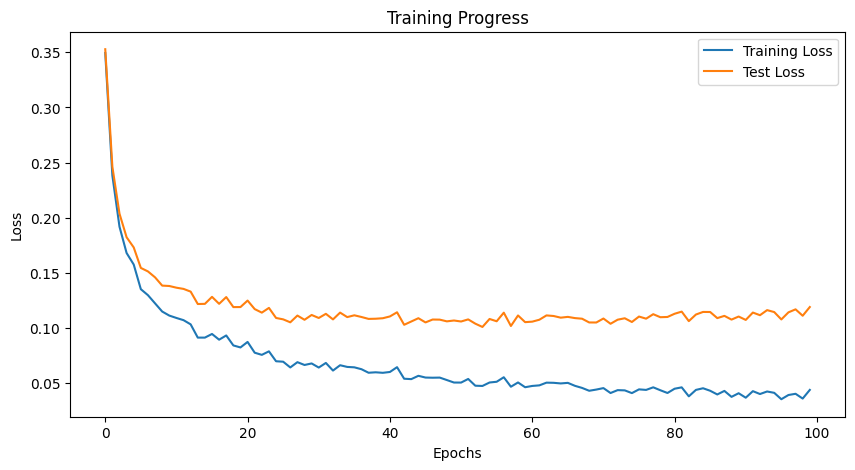

In [24]:
# Preprocess data with augmentation
x_train, x_test, y_train, y_test = preprocess_data(X, Y)

# Train with early stopping and monitoring
model, train_losses, test_losses = train_network(x_train, y_train, x_test, y_test)

# Plot the learning curves
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Progress')
plt.legend()
plt.show()

In [27]:
print(test_losses)

[1.0084221363067627, 0.7881694436073303, 0.7100223302841187, 0.663798451423645, 0.6269423365592957, 0.6124277114868164, 0.5897812843322754, 0.5784972310066223, 0.5704277157783508, 0.5556919574737549, 0.5516342520713806, 0.54296875, 0.5317578911781311, 0.5269348621368408, 0.5219240784645081, 0.5171276330947876, 0.5130174160003662, 0.5075955390930176, 0.5048801898956299, 0.49659761786460876, 0.49514156579971313, 0.49127474427223206, 0.4868931174278259, 0.48477810621261597, 0.48536592721939087, 0.4790152311325073, 0.478238582611084, 0.4813556373119354, 0.4715225100517273, 0.4685957431793213, 0.4690411686897278, 0.46695488691329956, 0.46694430708885193, 0.46451643109321594, 0.460593044757843, 0.45971953868865967, 0.46091800928115845, 0.4612574875354767, 0.4555060863494873, 0.4564798176288605, 0.45388513803482056, 0.45298275351524353, 0.45402440428733826, 0.45258256793022156, 0.45173242688179016, 0.45369821786880493, 0.4530465602874756, 0.4503873288631439, 0.44823765754699707, 0.45056259632

In [70]:
import gc
gc.collect()

4724

In [71]:
torch.cuda.empty_cache()

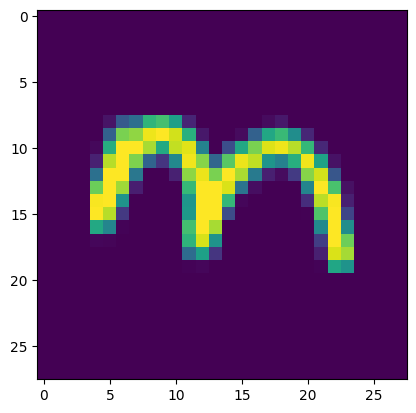

In [25]:
plt.imshow(x_test[1,:].cpu().reshape(28,28))

In [39]:
x_test.dim()

2

In [44]:
x_test[1,:].reshape((-1,2)).dim()

2

In [26]:
# testing manually


# First layer
h1 = torch.relu(x_test[1,:].float() @ model.W1 + model.b1)

# Second layer
h2 = torch.relu(h1 @ model.W2 + model.b2)

# Output layer - no activation
logits_testR = h2 @ model.W3 + model.b3

loss_test_man = F.cross_entropy(logits_testR, y_test[1,:].float())
loss_test_man

tensor(-0., device='cuda:0', grad_fn=<DivBackward1>)

In [27]:
test_preds = torch.argmax(logits_testR, dim=0)
test_preds

tensor(12, device='cuda:0')

In [28]:
reverse_map = {}
for num in range(26):
  reverse_map[num] = chr(ord('a')+num)
reverse_map

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z'}

In [15]:
state_dict = torch.load('/content/drive/MyDrive/Colab Notebooks/weights/Handwritten_letters_NN_model_98Acc.pt',weights_only=True)

In [16]:
state_dict

{'W1': tensor([[-0.1081,  0.0473,  0.0113,  ..., -0.0899, -0.1027,  0.0647],
         [-0.1344,  0.0209,  0.0176,  ..., -0.0882, -0.0694,  0.0734],
         [-0.1167,  0.0420, -0.0007,  ..., -0.0882, -0.0914,  0.0617],
         ...,
         [-0.0991,  0.0228, -0.0002,  ..., -0.0814, -0.0845,  0.0725],
         [-0.1096,  0.0553, -0.0110,  ..., -0.0782, -0.0846,  0.0610],
         [-0.1359,  0.0611, -0.0086,  ..., -0.0878, -0.0903,  0.0602]],
        device='cuda:0', requires_grad=True),
 'b1': tensor([ 5.2327, -0.8883, -7.1403, -2.7071,  1.7797,  2.1896,  5.4140, -4.5722,
         -0.5372,  1.3549, -1.7367, -1.1066], device='cuda:0',
        requires_grad=True),
 'W2': tensor([[-6.3698e-02,  1.8438e-01,  4.7484e-01, -1.7572e-01,  2.7495e-01,
          -1.1600e-03],
         [ 2.3861e-01, -8.6841e-02, -5.1384e-01,  1.0876e-01, -1.2311e-01,
          -3.9391e-03],
         [ 2.9477e-01, -6.2228e-02,  8.1747e-02,  7.4767e-01, -7.1825e-01,
          -4.5347e-03],
         [ 1.1282e+00,  1

In [17]:
model = NeuralNetwork()
model.W1 = state_dict['W1']
model.b1 = state_dict['b1']
model.W2 = state_dict['W2']
model.b2 = state_dict['b2']
model.W3 = state_dict['W3']
model.b3 = state_dict['b3']

z->z
m->m
o->o
t->t
o->o
t->t
s->o
t->t
w->w
l->l


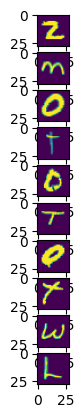

In [35]:
for i in range(10):
  plt.subplot(10,1,i+1)
  plt.imshow(x_test[i,:].cpu().reshape(28,28))
  # First layer
  h1 = torch.relu(x_test[i,:].float() @ model.W1 + model.b1)

  # Second layer
  h2 = torch.relu(h1 @ model.W2 + model.b2)

  # Output layer - no activation
  logits_testR = h2 @ model.W3 + model.b3
  test_preds = torch.argmax(logits_testR, dim=0)
  print(reverse_map[test_preds.item()],end='->')
  print(reverse_map[torch.argmax(y_test[i,:]).item()])

In [36]:
state_dict = {
        'W1': model.W1,
        'b1': model.b1,
        'W2': model.W2,
        'b2': model.b2,
        'W3': model.W2,
        'b3': model.b2,
}

torch.save(state_dict,'/content/Handwritten_letters_NN_model_98Acc.pt')

In [77]:
!mkdir '/content/drive/MyDrive/Colab Notebooks/weights'

In [31]:
!cp /content/Handwritten_letters_NN_model_98Acc.pt '/content/drive/MyDrive/Colab Notebooks/weights/'